In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/maindataset/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')

In [ ]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train.shape

(12976, 28)

In [ ]:
# Getting more info about the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [ ]:
# check how many values are none in each row of the train dataset
df_train.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [ ]:
# Since a large part of the dataset has columns with more than 70-80 percent missing values so Deleting those columns
df_train.dropna(axis = 1, inplace = True)
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [ ]:
# Describing the train set
df_train.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,6.800247
std,6309.074105,2.136913,4.212544,4.264330,8.970705
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,2.000000,2.000000
50%,10044.500000,4.000000,3.000000,3.000000,3.000000
75%,15681.250000,6.000000,4.000000,4.000000,8.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000


<Axes: xlabel='domain1_score', ylabel='Count'>

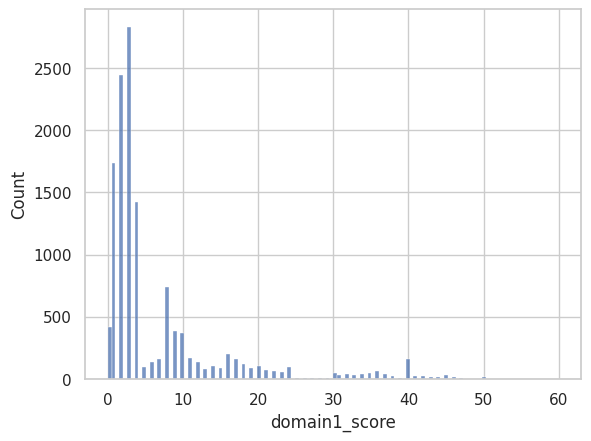

In [ ]:
sns.histplot(df_train['domain1_score'])

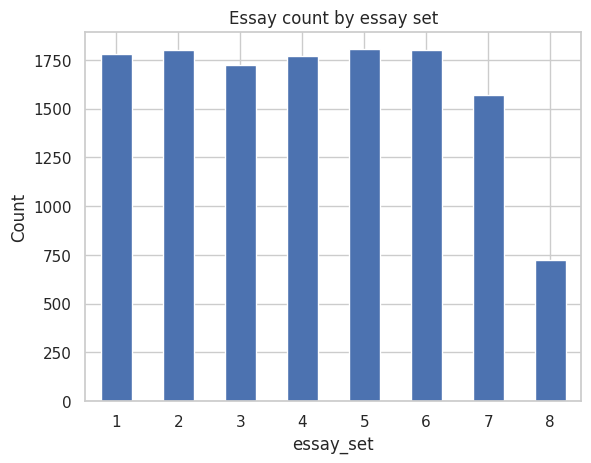

In [ ]:
df_train.groupby('essay_set').agg('count').plot.bar(y='essay', rot=0, legend=False)
plt.title('Essay count by essay set')
plt.ylabel('Count')
plt.show()


In [ ]:
df_train.groupby(['essay_set'])['domain1_score'].agg(['count','min', 'max',  'nunique'])


,count,min,max,nunique
essay_set,,,,
1,1783,2,12,11
2,1800,1,6,6
3,1726,0,3,4
4,1770,0,3,4
5,1805,0,4,5
6,1800,0,4,5
7,1569,2,24,23
8,723,10,60,34


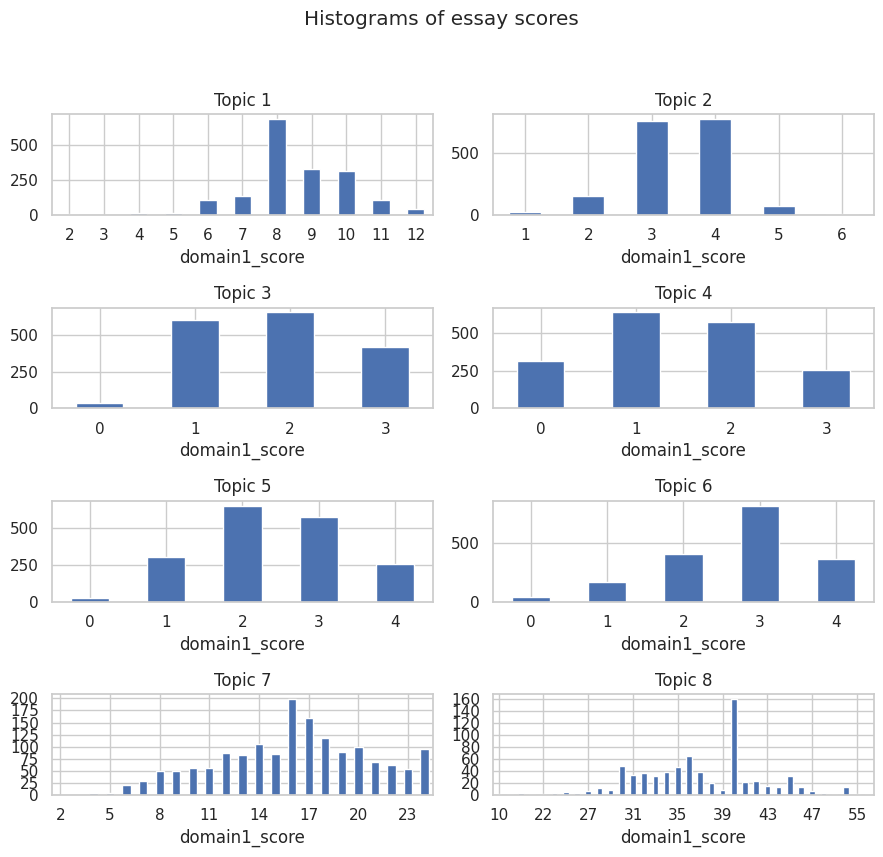

In [ ]:
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(9,9), sharey=False)
for i in range(4):
    for j in range(2):
        topic_number += 1
        df_train[df_train['essay_set'] == topic_number]\
            .groupby('domain1_score')['essay_id']\
            .agg('count')\
            .plot.bar(ax=ax[i, j], rot=0)
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Histograms of essay scores')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Checking how many unique essay id were given
print(df_train['essay_set'].nunique())
df_train['essay_set'].unique()

8


array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# Counting the number of eacy essay_set

print(df_train.groupby('essay_set').size())


essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
dtype: int64


So there is 8 unique set of essay in the given training set

In [ ]:
#  unique ratings which are being given by the rater1

print(df_train['rater1_domain1'].nunique())
df_train['rater1_domain1'].unique()

30


array([ 4,  5,  3,  6,  2,  1,  0,  8,  7, 11,  9, 10, 12, 18, 21, 15, 20,
       16, 23, 22, 17, 19, 25, 13, 30, 24, 14, 27, 26, 28])

In [ ]:
# Counting the number of rates of each rates given by rater1

print(df_train.groupby('rater1_domain1').size())

rater1_domain1
0      462
1     2062
2     2556
3     2789
4     2254
5      704
6      266
7      127
8      420
9      206
10     148
11     102
12     182
13      13
14       9
15     113
16      46
17      74
18      73
19      30
20     245
21      22
22      14
23      19
24       6
25      27
26       1
27       2
28       1
30       3
dtype: int64


In [ ]:
# unique ratings which are being given by the rater2

print(df['rater2_domain1'].nunique())
df['rater2_domain1'].unique()

29


array([ 4,  3,  5,  6,  2,  1,  0,  7,  8,  9, 12, 10, 11, 16, 26, 20, 15,
       18, 19, 25, 17, 24, 22, 30, 21, 14, 23, 13, 27])

In [ ]:
# Counting the number of rates of each rates given by rater2

print(df_train.groupby('rater2_domain1').size())

rater2_domain1
0      468
1     2091
2     2561
3     2698
4     2326
5      704
6      264
7      120
8      432
9      174
10     106
11     109
12     219
13       3
14       8
15     111
16      61
17      54
18      96
19      38
20     217
21      20
22      21
23      22
24       5
25      39
26       6
27       2
30       1
dtype: int64


In [ ]:
# Maximum domain score obtained by any essay

df_train['domain1_score'].max()

60

The maximum score that an essay scored is 60

In [ ]:
# Minimum domain score obtained by any essay

df_train['domain1_score'].min()

0

The minimum score that was scored by any essay is 0

## Visualization

In [ ]:
# Visualizing the percentage wise share of the various sets of essay

labels = df_train['essay_set'].value_counts().index
values = df_train['essay_set'].value_counts().values

colors = df_train['essay_set']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors, line=dict(color='#000000', width=2)),
                              title = "Distribution of sets of essay")])

fig.show()

In [ ]:
# Visualizing the percentage wise share of top 10 grades given by rater 1 and their percentage

labels = df_train['rater1_domain1'].value_counts()[:10].index
values = df_train['rater1_domain1'].value_counts()[:10].values

colors = df_train['rater1_domain1']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors),
                              title = "Top 10 grades given by rater 1 and their percentage")])

fig.show()

From the above plot we can see that a large section of the essay rated by rater1 received just rating as 3,2,4 and 1

In [ ]:
# Visualizing the percentage wise share of top 10 grades given by rater 2 and their percentage

labels = df_train['rater2_domain1'].value_counts()[:10].index
values = df_train['rater2_domain1'].value_counts()[:10].values

colors = df_train['rater2_domain1']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors),
                              title = "Top 10 grades given by rater2 and their percentage")])

fig.show()

From the above plot we can see that a large section of the essay rated by rater2 received just rating as 3,2,4 and 1

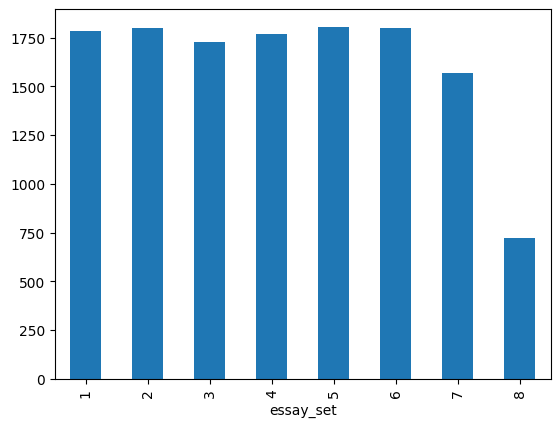

In [ ]:


import matplotlib.pyplot as plt
df_train.groupby('essay_set').size().plot.bar()
plt.show()


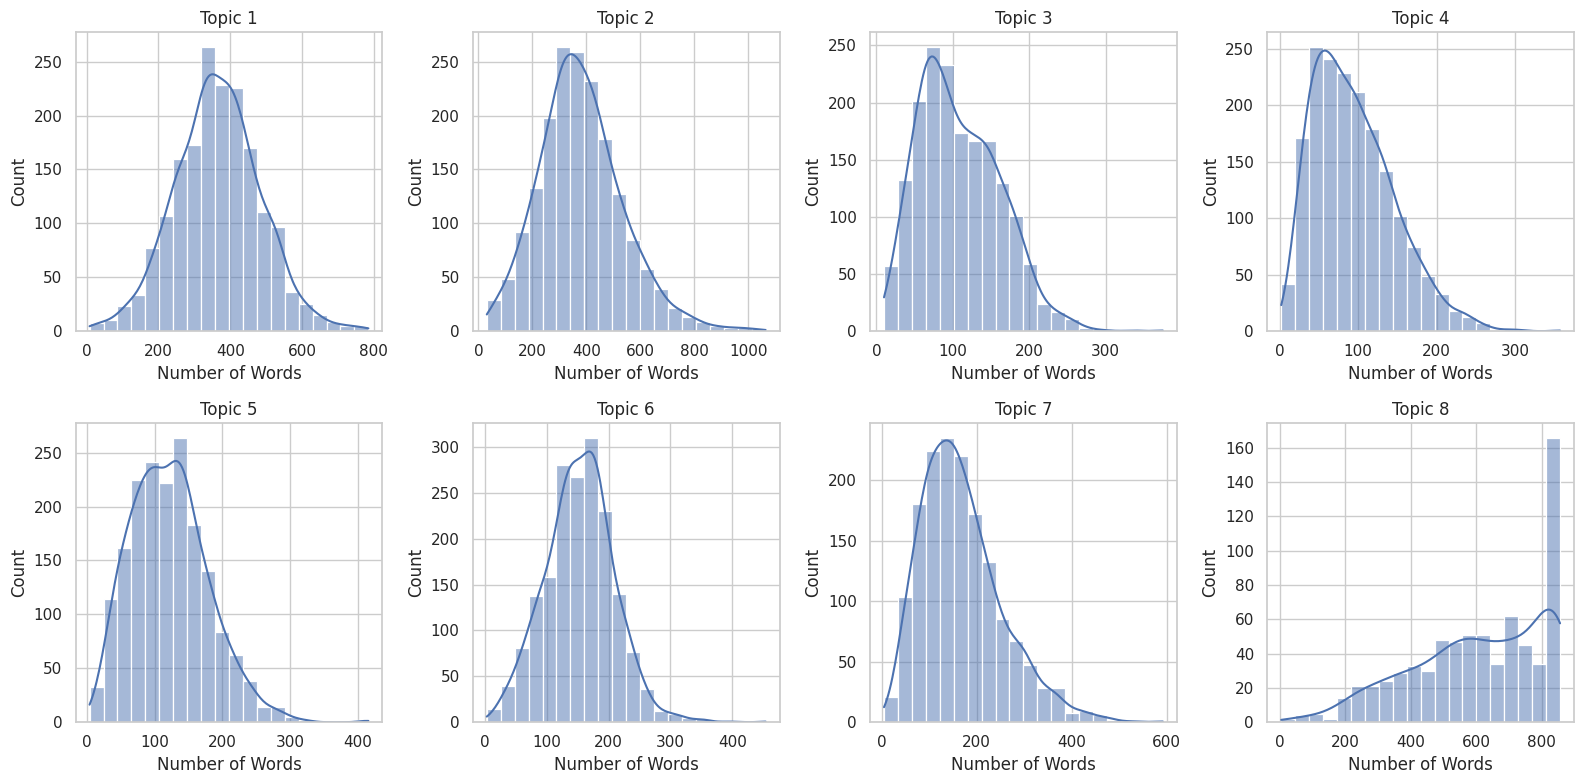

In [ ]:

topics = df_train['essay_set'].unique()

# Create subplots with 8 boxes (one for each topic)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot frequency plots for the number of words in each topic
for i, topic in enumerate(topics):
    subset_df = df_train[df_train['essay_set'] == topic]
    sns.histplot(subset_df['word_count'], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Topic {topic}')
    axes[i].set_xlabel('Number of Words')


# Adjust layout
plt.tight_layout()
plt.show()


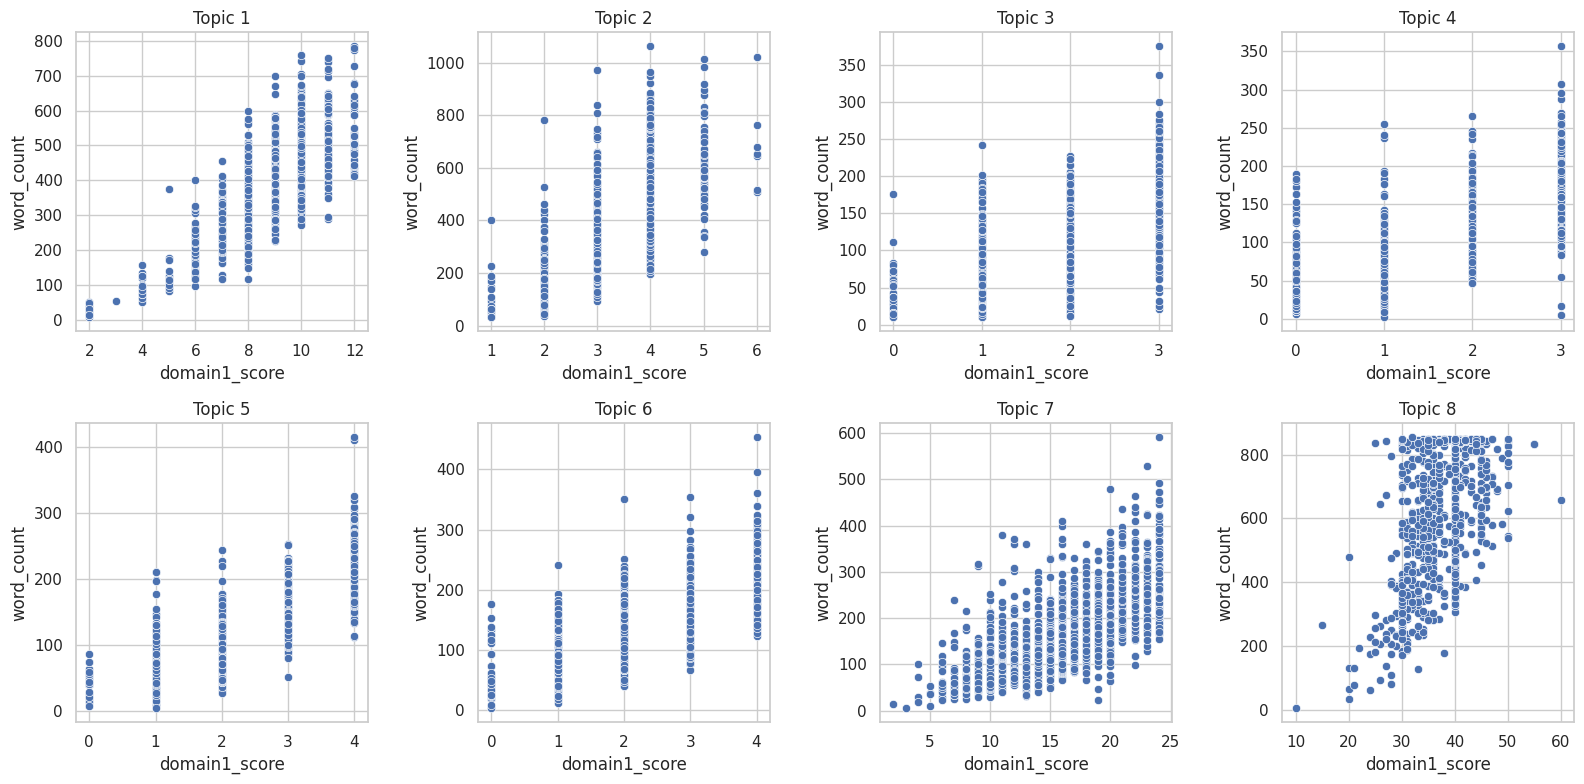

In [ ]:

topics = df_train['essay_set'].unique()

# Create subplots with 8 boxes (one for each topic)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot the number of words by score for each topic
for i, topic in enumerate(topics):
    subset_df = df_train[df_train['essay_set'] == topic]
    sns.scatterplot(data=subset_df, y='word_count', x='domain1_score', ax=axes[i])
    axes[i].set_title(f'Topic {topic}')

# Adjust layout
plt.tight_layout()
plt.show()


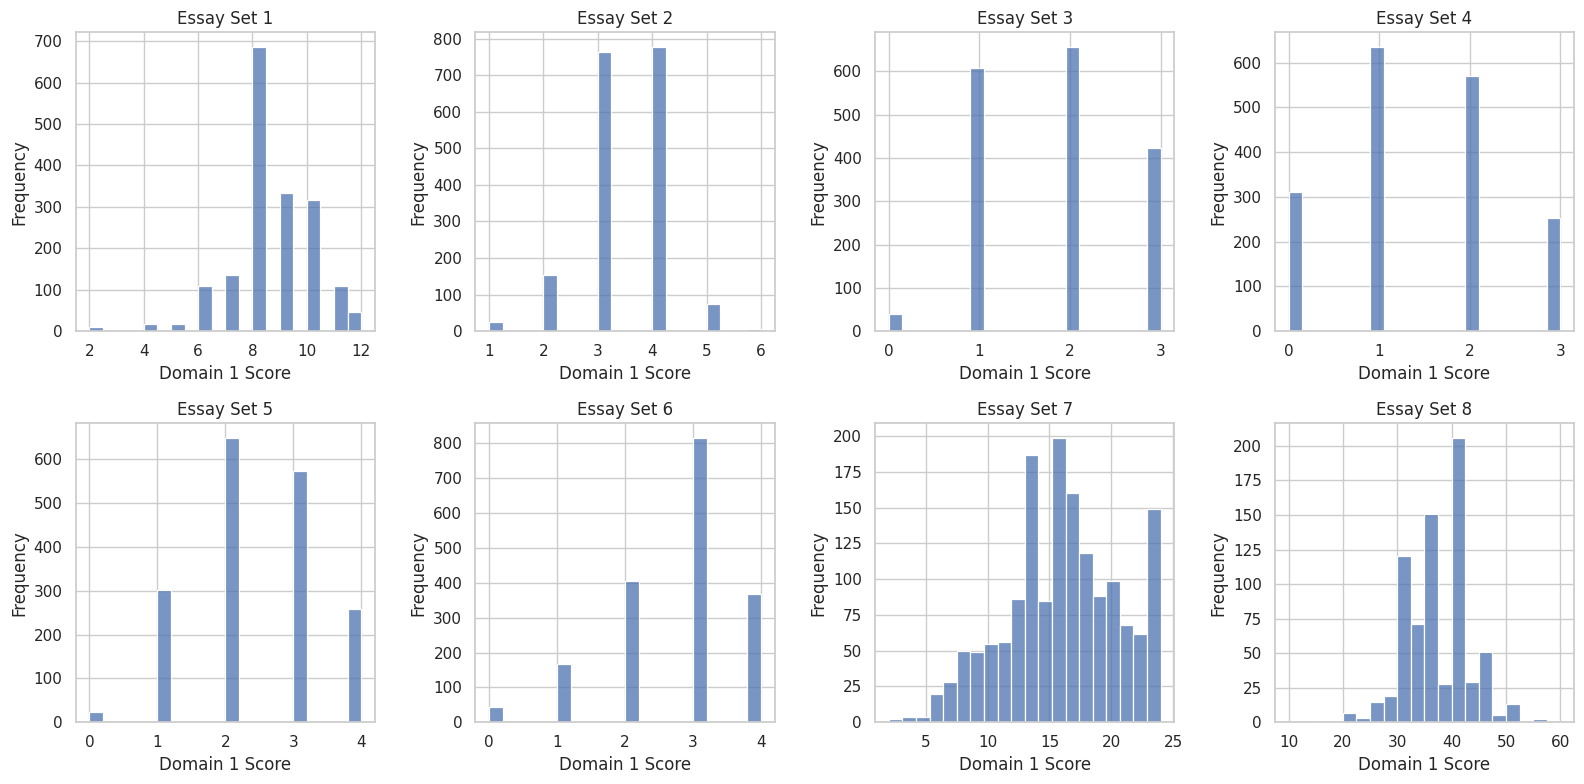

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train contains the original training data
# You can modify column names based on your actual dataset

# Create subplots with 8 boxes (one for each topic)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms of essay scores for each set
for i, essay_set in enumerate(df_train['essay_set'].unique()):
    subset_df = df_train[df_train['essay_set'] == essay_set]
    sns.histplot(subset_df['domain1_score'], bins=20, ax=axes[i])
    axes[i].set_title(f'Essay Set {essay_set}')
    axes[i].set_xlabel('Domain 1 Score')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-51-a85f3d976c28>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-a85f3d976c28>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-a85f3d976c28>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

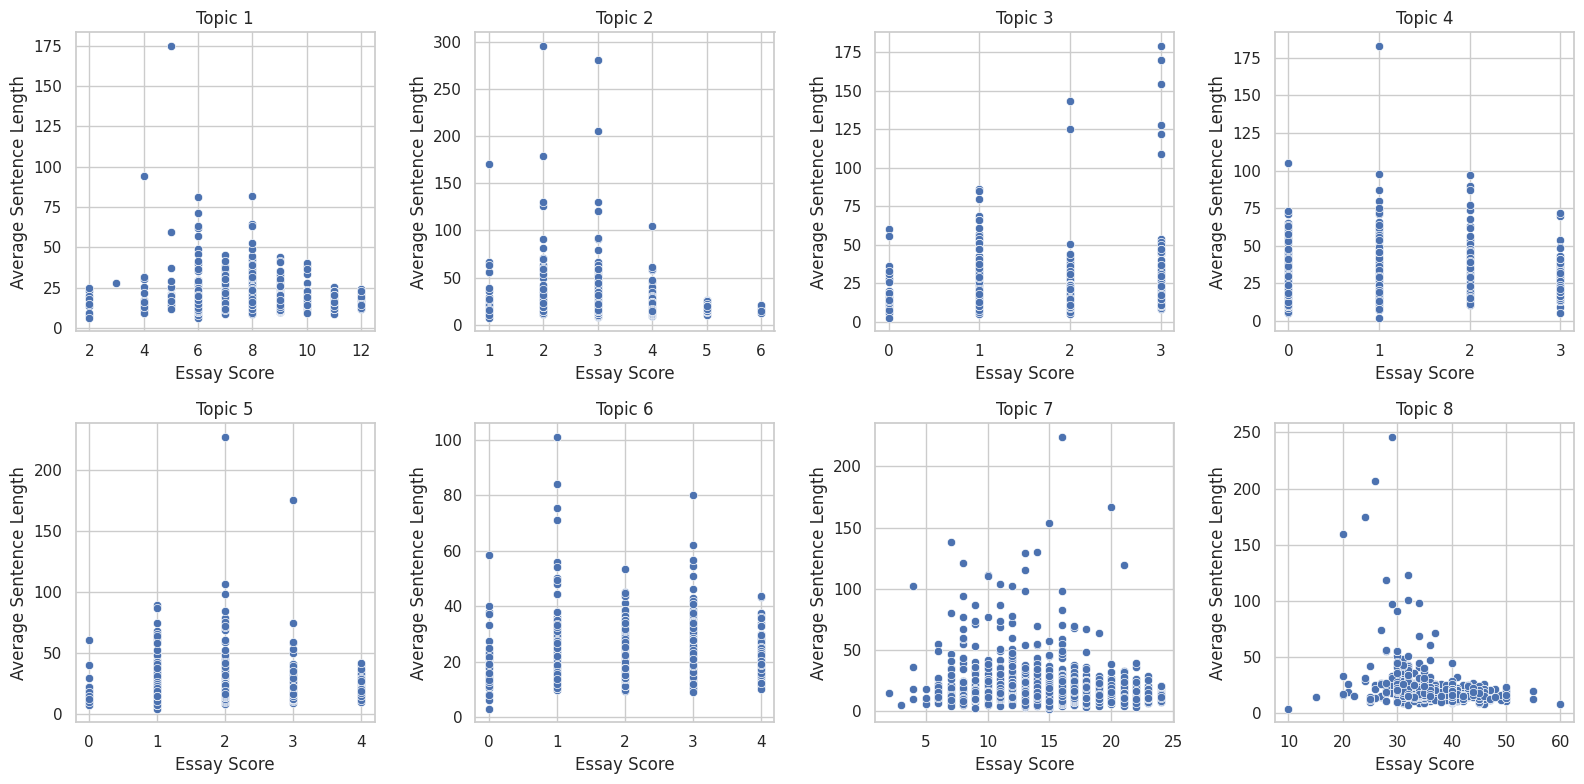

In [ ]:
import nltk
nltk.download('punkt')


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train contains the original training data
# You can modify column names based on your actual dataset
topics = df_train['essay_set'].unique()

# Create subplots for each topic
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot essay score vs average sentence length for each set
for i, topic in enumerate(topics):
    subset_df = df_train[df_train['essay_set'] == topic]

    # Calculate average sentence length for each essay
    subset_df['avg_sentence_length'] = subset_df['essay'].apply(lambda x: len(x.split()) / len(nltk.sent_tokenize(x)))

    sns.scatterplot(x='domain1_score', y='avg_sentence_length', data=subset_df, ax=axes[i])
    axes[i].set_title(f'Topic {topic}')
    axes[i].set_xlabel('Essay Score')
    axes[i].set_ylabel('Average Sentence Length')

# Adjust layout
plt.tight_layout()
plt.show()





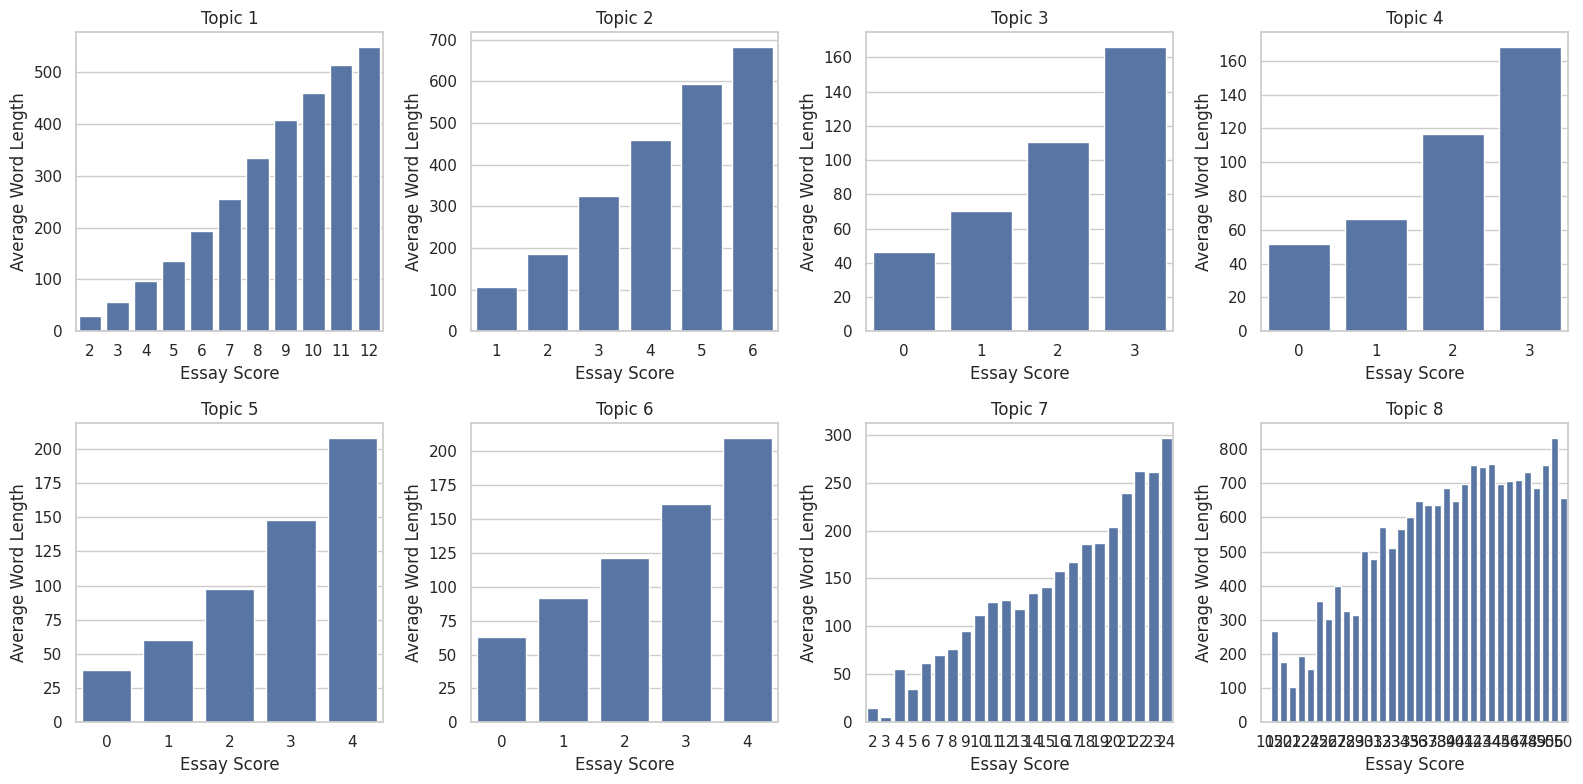

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train contains the original training data
# You can modify column names based on your actual dataset
topics = df_train['essay_set'].unique()

# Create subplots with 8 boxes (one for each topic)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Calculate average word length for each essay
df_train['avg_word_len'] = df_train['essay'].apply(lambda x: len(str(x).split()))
# Plot average word length for each essay score in each set
for i, topic in enumerate(topics):
    subset_df = df_train[df_train['essay_set'] == topic]
    avg_word_len = subset_df.groupby('domain1_score')['avg_word_len'].mean().reset_index()

    sns.barplot(x='domain1_score', y='avg_word_len', data=avg_word_len, ax=axes[i])
    axes[i].set_title(f'Topic {topic}')

    axes[i].set_xlabel('Essay Score')
    axes[i].set_ylabel('Average Word Length')

# Adjust layout
plt.tight_layout()
plt.show()



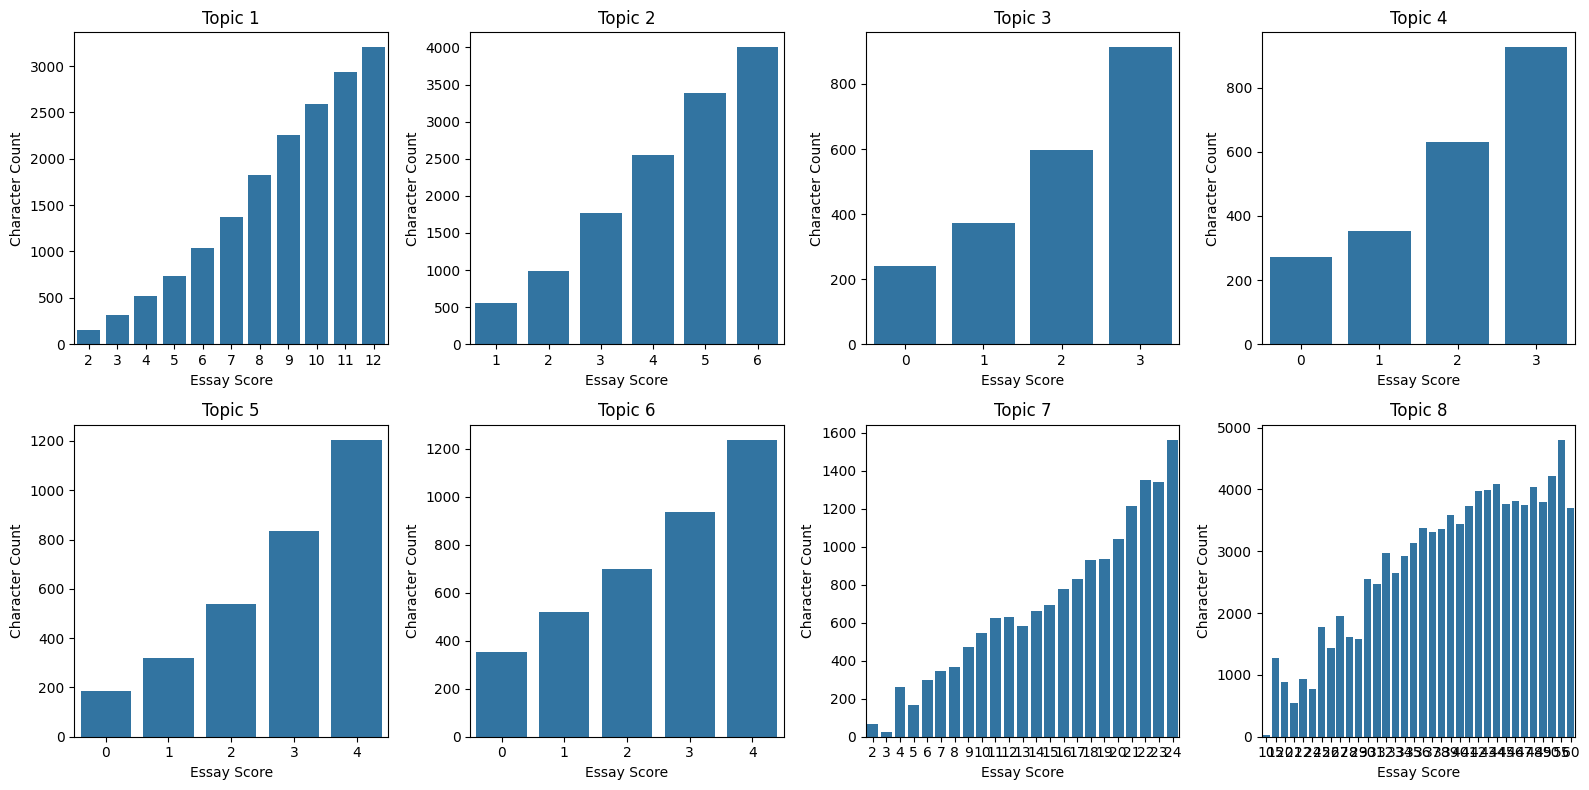

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train contains the original training data
# You can modify column names based on your actual dataset
topics = df_train['essay_set'].unique()

# Create subplots with 8 boxes (one for each topic)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Calculate character count for each essay
df_train['char_count'] = df_train['essay'].apply(lambda x: len(str(x)))
# Plot character count for each essay score in each set
for i, topic in enumerate(topics):
    subset_df = df_train[df_train['essay_set'] == topic]
    char_count = subset_df.groupby('domain1_score')['char_count'].mean().reset_index()

    sns.barplot(x='domain1_score', y='char_count', data=char_count, ax=axes[i])
    axes[i].set_title(f'Topic {topic}')

    axes[i].set_xlabel('Essay Score')
    axes[i].set_ylabel('Character Count')

# Adjust layout
plt.tight_layout()
plt.show()


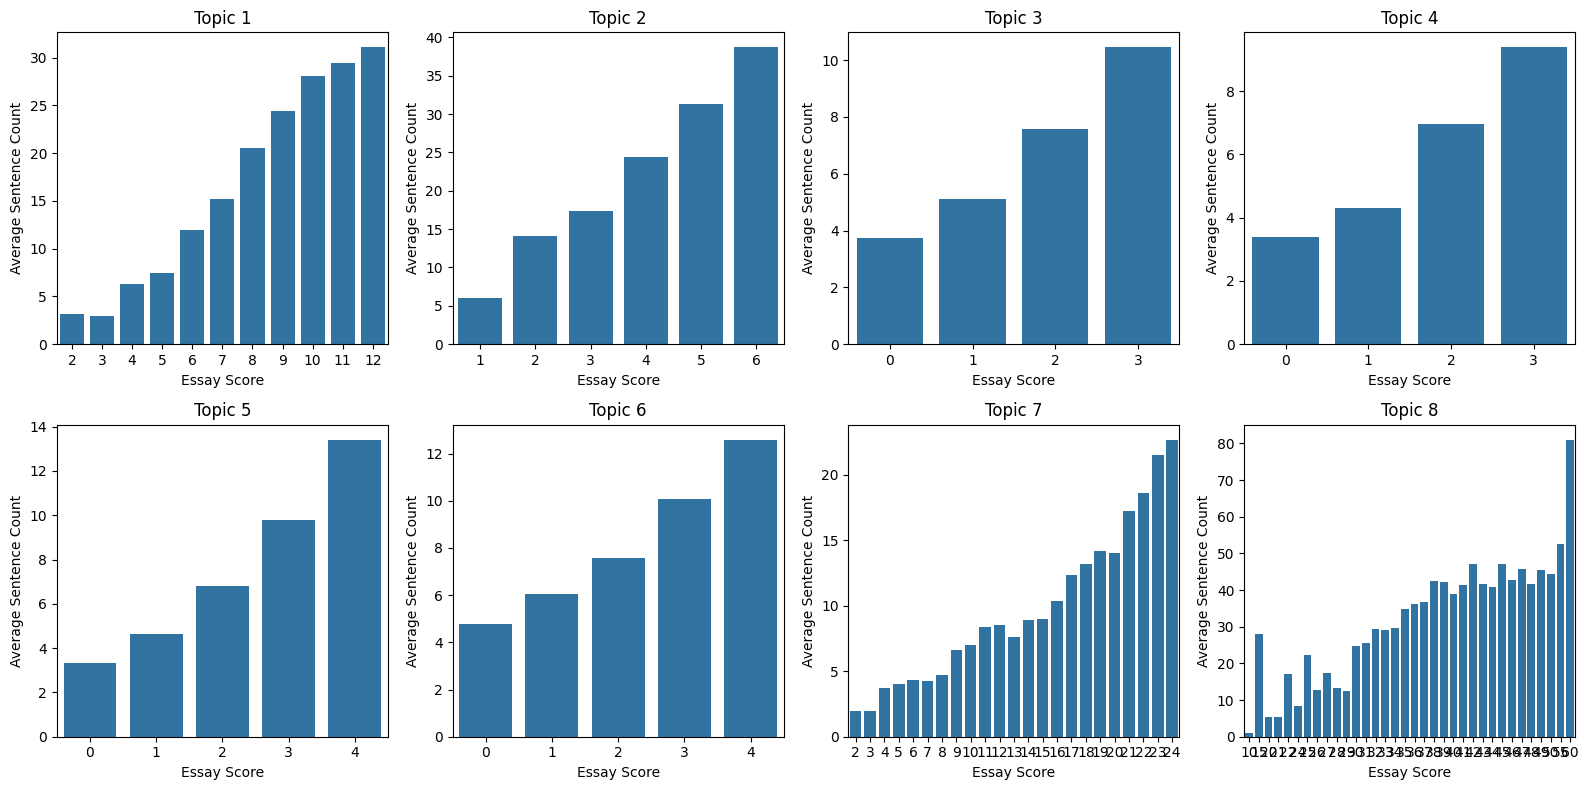

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train contains the original training data
# You can modify column names based on your actual dataset
topics = df_train['essay_set'].unique()

# Create subplots with 8 boxes (one for each topic)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Calculate average sentence count for each essay
df_train['sent_count'] = df_train['essay'].apply(lambda x: len(str(x).split('.')))
# Plot average sentence count for each essay score in each set
for i, topic in enumerate(topics):
    subset_df = df_train[df_train['essay_set'] == topic]
    avg_sent_count = subset_df.groupby('domain1_score')['sent_count'].mean().reset_index()

    sns.barplot(x='domain1_score', y='sent_count', data=avg_sent_count, ax=axes[i])
    axes[i].set_title(f'Topic {topic}')

    axes[i].set_xlabel('Essay Score')
    axes[i].set_ylabel('Average Sentence Count')

# Adjust layout
plt.tight_layout()
plt.show()


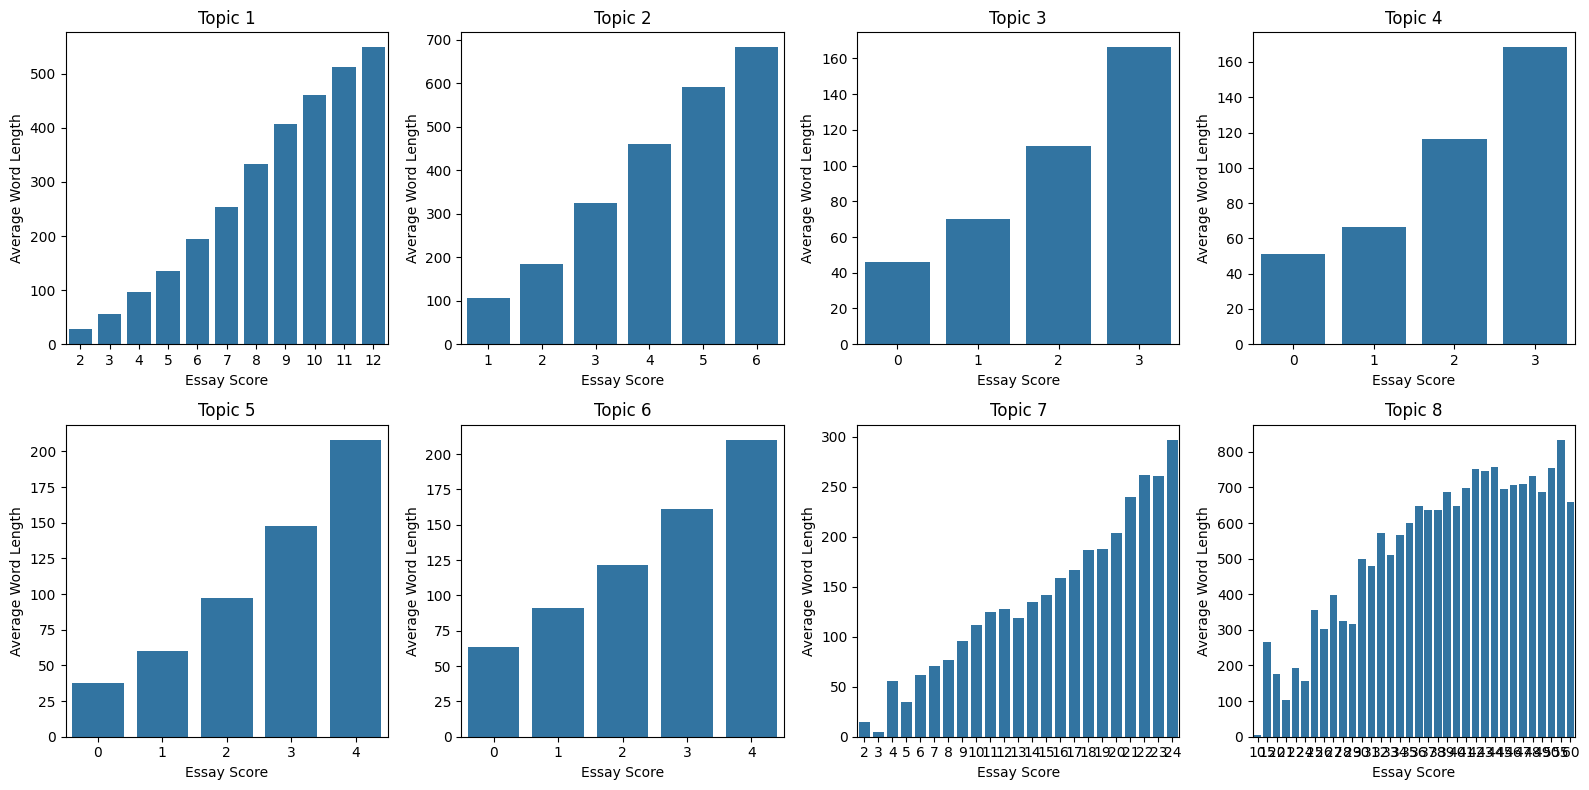

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train contains the original training data
# You can modify column names based on your actual dataset
topics = df_train['essay_set'].unique()

# Create subplots with 8 boxes (one for each topic)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Calculate average word length for each essay
df_train['avg_word_len'] = df_train['essay'].apply(lambda x: len(str(x).split()))

# Plot average word length for each essay score in each set
for i, topic in enumerate(topics):
    subset_df = df_train[df_train['essay_set'] == topic]
    avg_word_len = subset_df.groupby('domain1_score')['avg_word_len'].mean().reset_index()

    sns.barplot(x='domain1_score', y='avg_word_len', data=avg_word_len, ax=axes[i])
    axes[i].set_title(f'Topic {topic}')

    axes[i].set_xlabel('Essay Score')
    axes[i].set_ylabel('Average Word Length')

# Adjust layout
plt.tight_layout()
plt.show()
